In [1]:
"""Analysis of the earthquake data from the past month.

There will be 5 visualisation graphs.
-Bar Graph.
-Pie Chart.
-Box Plot.
-Line Chart.
-Scatter Plot.


More information about the dataset: https://www.kaggle.com/datasets/farazrahman/earthquake?taskId=6195
and https://earthquake.usgs.gov/data/comcat/index.php#depth

 """

'You should produce at least one of the following: \n\nBar Graph.\n-Pie Chart.\n-Box Plot.\n-Line Chart.\n-Scatter Plot.\nOnce you have demonstrated use of the different plots you should look at the data and make some conclusions from the data set. Can you find any links?\n\nPresent your conclusion illustrated with appropriate visualisations.\n\n\nMore information about the dataset: https://www.kaggle.com/datasets/farazrahman/earthquake?taskId=6195\nand https://earthquake.usgs.gov/data/comcat/index.php#depth\n\n '

In [2]:
#importing the libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the earthquake data as a dataframe called df
df = pd.read_csv("earthquake.csv")
#calling for the first few rows and last few rows
df.head()
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
11539,2023-04-17T03:00:45.480Z,33.984333,-117.055833,18.21,1.54,ml,66.0,25.0,0.06936,0.14,...,2023-04-17T19:39:57.340Z,"0km SSW of Calimesa, CA",earthquake,0.13,0.29,0.15800,35.0,reviewed,ci,ci
11540,2023-04-17T03:00:39.048Z,51.643700,-173.817500,18.40,2.20,ml,NaN,NaN,NaN,0.45,...,2023-04-21T16:34:02.967Z,"66 km SSE of Atka, Alaska",earthquake,NaN,5.20,NaN,NaN,reviewed,ak,ak
11541,2023-04-17T03:00:12.290Z,17.955000,-66.963167,8.71,1.83,md,3.0,206.0,0.07848,0.13,...,2023-04-17T03:23:12.950Z,"6 km WSW of Guánica, Puerto Rico",earthquake,2.97,1.50,0.16397,3.0,reviewed,pr,pr
11542,2023-04-17T02:56:02.928Z,61.259100,-146.868000,14.10,1.40,ml,NaN,NaN,NaN,0.51,...,2023-04-20T23:27:55.725Z,"31 km WNW of Valdez, Alaska",earthquake,NaN,0.80,NaN,NaN,reviewed,ak,ak
11543,2023-04-17T02:52:51.979Z,59.543500,-152.437900,60.30,2.20,ml,NaN,NaN,NaN,0.58,...,2023-04-20T23:27:55.437Z,"35 km NW of Nanwalek, Alaska",earthquake,NaN,0.40,NaN,NaN,reviewed,ak,ak


In [4]:
#getting details about the data, including the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11544 entries, 0 to 11543
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11544 non-null  object 
 1   latitude         11544 non-null  float64
 2   longitude        11544 non-null  float64
 3   depth            11544 non-null  float64
 4   mag              11544 non-null  float64
 5   magType          11544 non-null  object 
 6   nst              8310 non-null   float64
 7   gap              8310 non-null   float64
 8   dmin             6157 non-null   float64
 9   rms              11544 non-null  float64
 10  net              11544 non-null  object 
 11  id               11544 non-null  object 
 12  updated          11544 non-null  object 
 13  place            11544 non-null  object 
 14  type             11544 non-null  object 
 15  horizontalError  7632 non-null   float64
 16  depthError       11544 non-null  float64
 17  magError    

In [5]:
#checking if there are null values, 6 categories have missing values, with about 3k NaN at least.
df.isnull().sum()

# #fill the missing values with 0 as there are missing values in 6 columns with about 3k NaN at least.
df = df.fillna(0)


In [6]:
#getting the summary statistics for quantitative data
df.describe()

#exploring the categorical data with it's unique values: .unique();
# how many different values: use .nunique()
# how many for each value: use .value_counts; 

#type
df['type'].unique()  #outputs ['earthquake', 'quarry blast', 'explosion', 'other event','ice quake', 'chemical explosion']

#status
df['status'].unique() #reviewed, automatic
df['status'].value_counts() #status reviewed     10082 automatic     1462

#locationSource and magSource
df['locationSource'].unique() #array(['nc', 'ak', 'hv', 'ci', 'pr', 'us', 'uw', 'uu', 'ok', 'nn', 'mb','tx', 'se', 'nm', 'av'], dtype=object)
df['magSource'].unique() #array(['nc', 'ak', 'hv', 'ci', 'pr', 'us', 'guc', 'uw', 'uu', 'ok', 'nn','mb', 'tx', 'se', 'nm', 'av'], dtype=object)
same_location_and_source = df['locationSource'] ==df['magSource'] #True     11536 False        8 
same_location_and_source.value_counts() #only 8 events have been reported from different locations and sources

#place
df['place'].unique() #outputs ['6km NNW of The Geysers, CA', '18 km SSW of Tyonek, Alaska','6km W of Cobb, CA', ..., '66 km SSE of Atka, Alaska','31 km WNW of Valdez, Alaska', '35 km NW of Nanwalek, Alaska']
df['place'].nunique() #6035 different places for where the earthquake happened

#creating a 'country' column from place column
df['country'] = df['place'].str.rsplit(',').str[-1] 
df['country'].nunique() #214countries - the seismic events are recorded around the world


214

<Axes: title={'center': 'The errors in earthquakes reported measures '}, ylabel='distance (km)'>

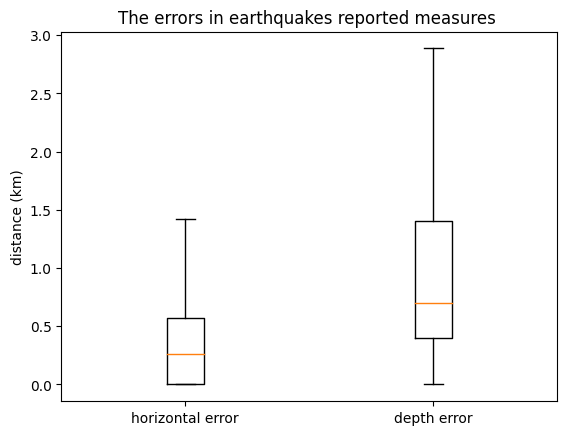

In [7]:
#Boxplot. Showing the difference between the uncertainty of reported horizontal and depth of the seismic events in kilometers
#There was one outlier of depth of 300km and it has been removed( with option showfliers= False). The depth error is much bigger of the horizontal error. It could
#due to the fact that measurements going deeper into the Earth is not accurate or good enough to detect the exact depth.

fig,ax = plt.subplots()
ax.boxplot([df['horizontalError'],df['depthError']],showfliers=False)
ax.set_xticklabels(['horizontal error','depth error'])
ax.set_ylabel('distance (km)')
ax.set_title('The errors in earthquakes reported measures ')
plt.subplot()

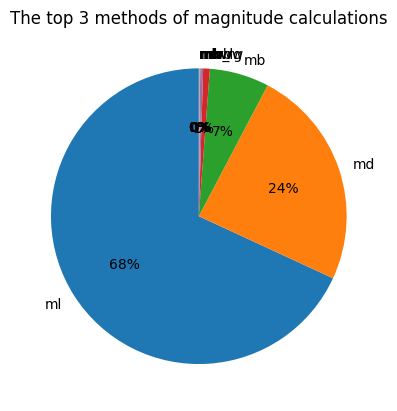

In [8]:
#Pie Chart. 

#pie chart for type of methods or algorithms used to calculate the event, We can see there are 3 main ones: 'ml','md' and 'mb', 
#which we can further explore by how much the depth error is caused by each of the method, and how to reduce the error in the future.

mag_type = pd.DataFrame(df['magType'].value_counts()).reset_index()

plt.pie(x =mag_type['count'],  labels = mag_type['magType'],startangle = 90,autopct='%.0f%%')
plt.title('The top 3 methods of magnitude calculations')
plt.show() 

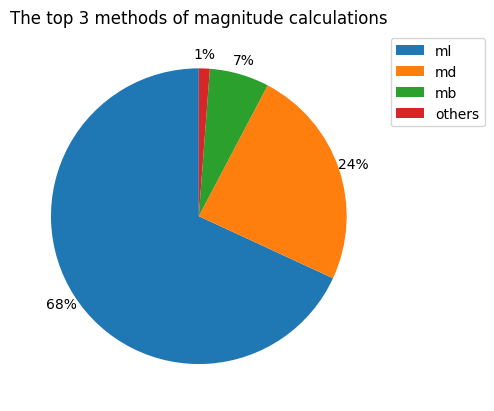

In [9]:
#to clean the labels, we group the non-top 3 magType together

start = 3
mag_type_others = mag_type.groupby(lambda x: x if x < start else start).sum()
mag_type_others = mag_type_others.replace(to_replace='mwwmwrmb_lgmwmhmlrmwbmlv', value= 'others')

fig,ax= plt.subplots()
plt.pie(x =mag_type_others['count'],  labels = mag_type_others['magType'],startangle = 90,autopct='%.0f%%',pctdistance=1.1, labeldistance=None)
plt.title('The top 3 methods of magnitude calculations')
plt.legend(bbox_to_anchor=(1,1))
plt.show() 

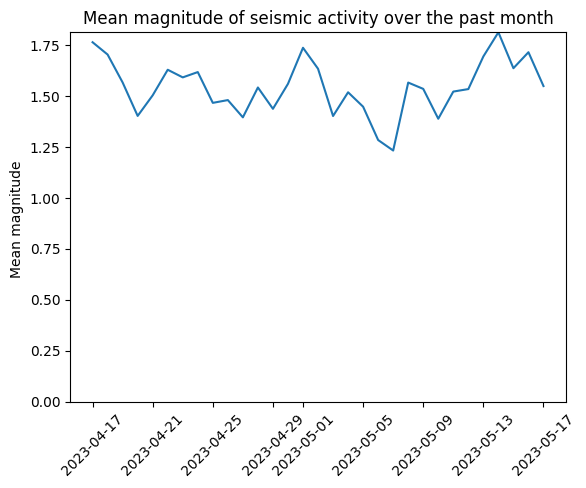

In [10]:
#Line plot. To understand the level of seismic activity in the world in the last month.

# The magnitude is never 0 which shows that there is always movement which means the Earth is always moving 
# between 1.25 and 1.75 in magnitude in average, suggesting we should be safe.

#importing datetime to separate the date( yy-mm-dd ) and time (hour,min,sec) from the 'time' column into their own 
import datetime
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['time_hms'] = df['time'].dt.time
df['date'].unique()  #31 # the data is on collected on a month of 31 days

#getting a dataframe of each day with the mean of all event during that day
mag_mean = df.groupby('date')['mag'].mean().reset_index()

plt.plot(mag_mean['date'], mag_mean['mag'])
plt.ylabel("Mean magnitude ")
plt.title("Mean magnitude of seismic activity over the past month")
plt.xticks(rotation=45)
plt.ylim([0, max(mag_mean['mag'])])
plt.show()

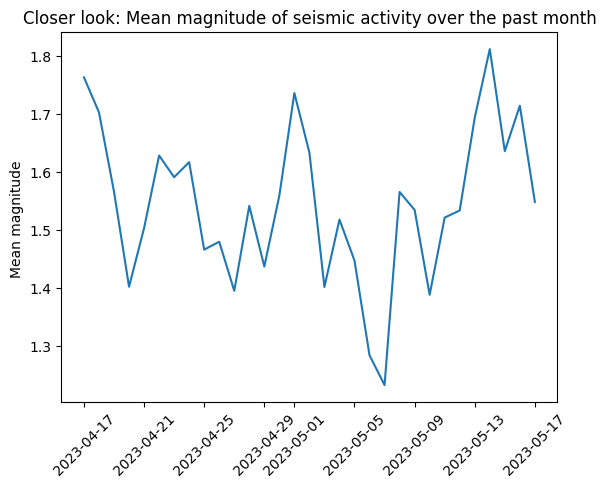

In [11]:
#for closer look of the graph, we remove the y-axis starting at 0

#From the graph, we can see that there are 3 peaks at the beginning, middle and end of the month which suggests stronger activity 
# levels compared to other times. The lowest magnitude is in the week of 5th MAy 2023. 

plt.plot(mag_mean['date'], mag_mean['mag'])
plt.ylabel("Mean magnitude ")
plt.title("Closer look: Mean magnitude of seismic activity over the past month")
plt.xticks(rotation=45)
#plt.ylim([0, max(mag_mean['mag'])])

plt.show()

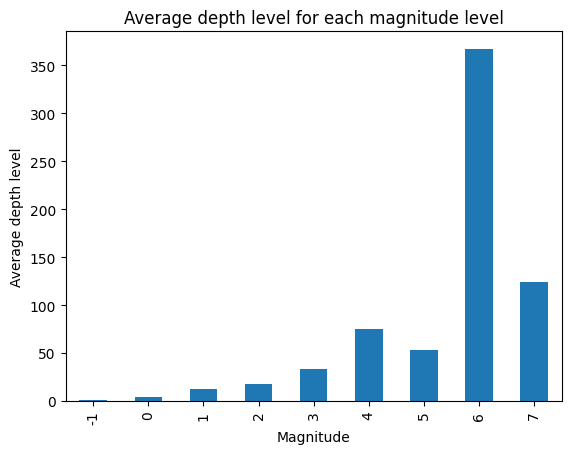

In [12]:
#Bar chart. To get an onverview of the average depth level for each magnitude. 

#From the graph, we can see that it's a magnitude 6 that the average depth lvel is the highest, at more than twice than the 
# 2nd highest.

#subsetting the main dataframe df to only getting the 'mag' and 'depth' column
df_mag = df.loc[:,['mag','depth']]
df_mag = df_mag.groupby('mag')['depth'].mean().reset_index()
df_mag['mag'] = df_mag['mag'].astype('int')  #converting the mag column as an integer to become a categorical variable for grouping
df_mag = df_mag.groupby('mag')['depth'].mean().reset_index() 

fig, ax = plt.subplots()
df_mag.plot(kind ='bar', x='mag', y='depth', ax=ax, legend= None)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Average depth level')
ax.set_title('Average depth level for each magnitude level')
plt.show()

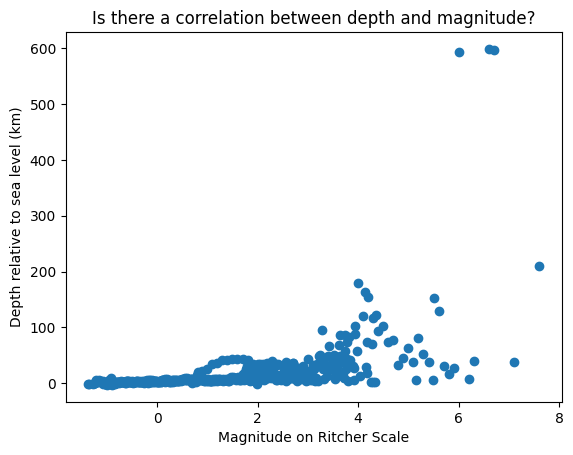

In [13]:
#Scatter plot. To find out if there is a correlation between depth and magnitude.

#From the graph: the majority of the events happen at around 0-50km t0 tthe sea level for magnitude up to 6 only. 
# At magnitude 3 to 4, that's where the depth can go up to 100km in depth.
# There are few seismic events between 4 and 5 , where the earthquake begins to rupture up to 200km below sea level
#Events of magnitude above 6 are very rare - outliers - and that's where you can find the ruptures from the deepest depths level down.
#Those below 0 on the x-axis means the rupture bgeins above sea level which could come from mountains.


mag_mean_over_depth = df.groupby('mag')['depth'].mean().reset_index()

fig, ax = plt.subplots()

plt.scatter(mag_mean_over_depth['mag'],mag_mean_over_depth['depth'])
ax.set_xlabel('Magnitude on Ritcher Scale')
ax.set_ylabel('Depth relative to sea level (km)')
ax.set_title('Is there a correlation between depth and magnitude?')

plt.show()

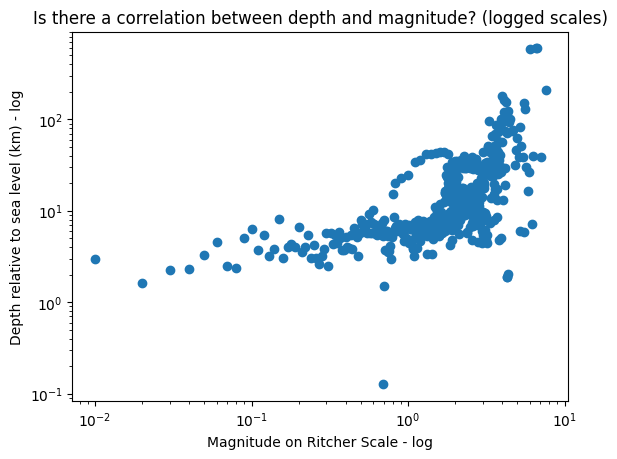

In [14]:
#By logging the scales, we can see that there is a positive correlation between magnitude and depth at which the earthquake
# ruptures below the sea level. The relationship is not linear but exponential, which means the higher the magnitude, the higher
#change it will come from extremly deep below the sea level.

fig, ax = plt.subplots()

plt.scatter(mag_mean_over_depth['mag'],mag_mean_over_depth['depth'])
ax.set_xlabel('Magnitude on Ritcher Scale - log')
ax.set_ylabel('Depth relative to sea level (km) - log')
ax.set_title('Is there a correlation between depth and magnitude? (logged scales)')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

In [ ]:
"""Conclusion
There are some errors in the predictions of the exact location of where each seismic event occurs on the boxplot graph. So we can look into the source.
Most of the predictions are based on the ml, md,mb techniques or algorithms to calculate the magnitude. So we can explore further these techniques and
improve the accuracy for the future.

Next, we use a line plot to visually the patterns of the average seismic level for the last month. The magnitudes alternate within 1.25 and 1.75 which 
is consistent and we shouldn't be worried for major earthquakes.

Then, we went on to explore which level of depths in km were causing the magnitudes of seismic events. At level 6 were the highest average magnitude.

Hence, we explored the relationship between the magnitude and the depth relative to the sea level of the earthquakes' ruptures. 
We found that there is a positive correlation where it's also exponential: meaning the deeper the rupture occurs, the higher the magnitude.

For the past month, there has not been any major earthquakes to be worried of. Further investigation about the methods of determining the exact location
of seismic events could improve better prediction.
"""